___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [118]:
import pyforest
import plotly
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [189]:
male = pd.read_csv("ANSUR_II_MALE_Public.csv", encoding="latin-1")
female = pd.read_csv("ANSUR_II_FEMALE_Public.csv")

In [190]:
male.shape

(4082, 108)

In [191]:
female.shape

(1986, 108)

In [192]:
male.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [193]:
female.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [194]:
df = pd.concat([male, female])

In [195]:
df.shape

(6068, 109)

In [196]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372

In [197]:
target = df.DODRace 

In [198]:
df.drop("DODRace", inplace=True, axis=1)

In [199]:
df["DODRace"] = target

In [200]:
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,Age,Heightin,Weightlbs,WritingPreference,SubjectId,DODRace
0,10027.0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,41,71,180,Right hand,NaN,1
1,10032.0,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,35,68,160,Left hand,NaN,1
2,10033.0,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,42,68,205,Left hand,NaN,2
3,10092.0,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,31,66,175,Right hand,NaN,1
4,10093.0,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6068 entries, 0 to 1985
Columns: 109 entries, subjectid to DODRace
dtypes: float64(2), int64(98), object(9)
memory usage: 5.1+ MB


In [203]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
subjectid,4082.0,20003.370897,6568.435122,10027.0,14270.25,17236.5,27315.75,29452.0
abdominalextensiondepthsitting,6068.0,246.468688,37.400106,155.0,219.00,242.0,271.00,451.0
acromialheight,6068.0,1406.161338,79.091048,1115.0,1350.00,1410.0,1462.00,1683.0
acromionradialelength,6068.0,327.374423,20.720018,249.0,313.00,328.0,341.25,393.0
anklecircumference,6068.0,224.891397,16.051833,156.0,214.00,225.0,235.00,293.0
axillaheight,6068.0,1299.608767,72.022286,1038.0,1249.00,1302.0,1349.00,1553.0
balloffootcircumference,6068.0,244.192650,16.845020,186.0,232.00,245.0,256.00,306.0
balloffootlength,6068.0,194.754614,13.516368,151.0,185.00,195.0,204.00,245.0
biacromialbreadth,6068.0,399.204186,30.236914,283.0,376.00,404.0,421.00,489.0
bicepscircumferenceflexed,6068.0,340.934245,41.519866,216.0,311.00,341.0,370.00,490.0


In [204]:
df.select_dtypes(include="object").columns

Index(['Gender', 'Date', 'Installation', 'Component', 'Branch', 'PrimaryMOS', 'SubjectsBirthLocation', 'Ethnicity', 'WritingPreference'], dtype='object')

In [205]:
df = df[df.DODRace < 4]

In [206]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [207]:
df.duplicated().any()

False

In [208]:
pd.Series(df.columns)

0                           subjectid
1      abdominalextensiondepthsitting
2                      acromialheight
3               acromionradialelength
4                  anklecircumference
5                        axillaheight
6             balloffootcircumference
7                    balloffootlength
8                   biacromialbreadth
9           bicepscircumferenceflexed
10                   bicristalbreadth
11                   bideltoidbreadth
12                 bimalleolarbreadth
13                   bitragionchinarc
14          bitragionsubmandibulararc
15                 bizygomaticbreadth
16               buttockcircumference
17                       buttockdepth
18                      buttockheight
19                  buttockkneelength
20             buttockpopliteallength
21                  calfcircumference
22                    cervicaleheight
23                       chestbreadth
24                 chestcircumference
25                         chestdepth
26          

In [209]:
df.Installation.value_counts()

Camp Shelby       1111
Fort Bliss         925
Fort Gordon        636
Camp Atterbury     432
Fort McCoy         432
Fort Hood          416
Fort Huachuca      404
Fort Bragg         373
Fort Drum          369
Fort Lee           356
Fort Stewart       314
Fort Rucker          1
Name: Installation, dtype: int64

In [210]:
df.PrimaryMOS

0       19D
1       68W
2       68W
3       88M
4       92G
       ... 
1981    42A
1982    25U
1983    42A
1984    92Y
1985    92F
Name: PrimaryMOS, Length: 5769, dtype: object

In [211]:
(df.SubjectNumericRace == df.DODRace).any()

True

In [212]:
df.drop(["Date", "subjectid", "Ethnicity", "PrimaryMOS", "SubjectNumericRace", "Heightin","Weightlbs"], axis=1, inplace=True)

In [213]:
df.select_dtypes(include="object").columns

Index(['Gender', 'Installation', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [214]:
df.shape

(5769, 102)

In [215]:
df.shape

(5769, 102)

In [216]:
pd.Series(df.columns)

0      abdominalextensiondepthsitting
1                      acromialheight
2               acromionradialelength
3                  anklecircumference
4                        axillaheight
5             balloffootcircumference
6                    balloffootlength
7                   biacromialbreadth
8           bicepscircumferenceflexed
9                    bicristalbreadth
10                   bideltoidbreadth
11                 bimalleolarbreadth
12                   bitragionchinarc
13          bitragionsubmandibulararc
14                 bizygomaticbreadth
15               buttockcircumference
16                       buttockdepth
17                      buttockheight
18                  buttockkneelength
19             buttockpopliteallength
20                  calfcircumference
21                    cervicaleheight
22                       chestbreadth
23                 chestcircumference
24                         chestdepth
25                        chestheight
26          

In [217]:
df.drop("SubjectId", axis=1, inplace=True)

In [220]:
df.shape

(5769, 101)

In [219]:
df2 = df.copy()

In [234]:
df2 = df2.reset_index(drop=True)

In [235]:
df2.shape

(5769, 101)

In [221]:
df = pd.get_dummies(data=df, drop_first=True)

In [223]:
df.shape

(5769, 248)

In [224]:
cont = []
cat = []
for col in df.columns:
    if df[col].value_counts().size > 2:
        cont.append(col)
    else: cat.append(col)

In [225]:
cat

['Gender_Male',
 'Installation_Camp Shelby',
 'Installation_Fort Bliss',
 'Installation_Fort Bragg',
 'Installation_Fort Drum',
 'Installation_Fort Gordon',
 'Installation_Fort Hood',
 'Installation_Fort Huachuca',
 'Installation_Fort Lee',
 'Installation_Fort McCoy',
 'Installation_Fort Rucker',
 'Installation_Fort Stewart',
 'Component_Army Reserve',
 'Component_Regular Army',
 'Branch_Combat Service Support',
 'Branch_Combat Support',
 'SubjectsBirthLocation_Alaska',
 'SubjectsBirthLocation_Antigua and Barbuda',
 'SubjectsBirthLocation_Argentina',
 'SubjectsBirthLocation_Arizona',
 'SubjectsBirthLocation_Arkansas',
 'SubjectsBirthLocation_Azerbaijan',
 'SubjectsBirthLocation_Bahamas',
 'SubjectsBirthLocation_Barbados',
 'SubjectsBirthLocation_Belarus',
 'SubjectsBirthLocation_Belgium',
 'SubjectsBirthLocation_Belize',
 'SubjectsBirthLocation_Bermuda',
 'SubjectsBirthLocation_Bolivia',
 'SubjectsBirthLocation_Bosnia and Herzegovina',
 'SubjectsBirthLocation_Brazil',
 'SubjectsBirthLo

In [226]:
lst = cont

In [227]:
def outlier_report(df, cols, whisker=3):
    res = {}
    for col in cols:
        iqr = np.quantile(df[col],[.25,.75])[1] - np.quantile(df[col],[.25,.75])[0]
        lower_limit = np.quantile(df[col],[.25,.75])[0]- iqr*whisker 
        upper_limit = np.quantile(df[col],[.25,.75])[1]+iqr*whisker
        num = len([c for c in df[col].to_list() if (c<lower_limit or c>upper_limit)])
        if num > 0:res[col]={"lower_limit":lower_limit, "upper_limit":upper_limit, "iqr": iqr, "# of outliers":num}
    return pd.DataFrame(res).T
res = outlier_report(df, lst)

In [228]:
res

,lower_limit,upper_limit,iqr,# of outliers
abdominalextensiondepthsitting,64.0,428.0,52.0,1.0
chestdepth,126.0,378.0,36.0,1.0
hipbreadth,236.0,460.0,32.0,2.0
hipbreadthsitting,235.0,536.0,43.0,2.0
lowerthighcircumference,255.0,556.0,43.0,1.0
thighclearance,103.0,250.0,21.0,1.0
waistdepth,57.0,400.0,49.0,1.0


<AxesSubplot:xlabel='DODRace', ylabel='count'>

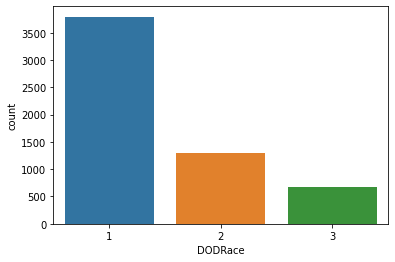

In [229]:
sns.countplot(df.DODRace)

In [230]:
df = df.reset_index(drop=True)

In [231]:
df3 = df.copy()

In [214]:
df.to_csv("soldier_race_final.csv", index=False)

## Explore Data

In [3]:
df = pd.read_csv("soldier_race_final.csv")

In [4]:
df.shape

(5769, 248)

In [5]:
df.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Age,DODRace,Gender_Male,Installation_Camp Shelby,Installation_Fort Bliss,Installation_Fort Bragg,Installation_Fort Drum,Installation_Fort Gordon,Installation_Fort Hood,Installation_Fort Huachuca,Installation_Fort Lee,Installation_Fort McCoy,Installation_Fort Rucker,Installation_Fort Stewart,Component_Army Reserve,Component_Regular Army,Branch_Combat Service Support,Branch_Combat Support,SubjectsBirthLocation_Alaska,SubjectsBirthLocation_Antigua and Barbuda,SubjectsBirthLocation_Argentina,SubjectsBirthLocation_Arizona,SubjectsBirthLocation_Arkansas,SubjectsBirthLocation_Azerbaijan,SubjectsBirthLocation_Bahamas,SubjectsBirthLocation_Barbados,SubjectsBirthLocation_Belarus,SubjectsBirthLocation_Belgium,SubjectsBirthLocation_Belize,SubjectsBirthLocation_Bermuda,SubjectsBirthLocation_Bolivia,SubjectsBirthLocation_Bosnia and Herzegovina,SubjectsBirthLocation_Brazil,SubjectsBirthLocation_British Virgin Islands,SubjectsBirthLocation_Bulgaria,SubjectsBirthLocation_California,SubjectsBirthLocation_Cameroon,SubjectsBirthLocation_Canada,SubjectsBirthLocation_Cape Verde,SubjectsBirthLocation_Chile,SubjectsBirthLocation_Colombia,SubjectsBirthLocation_Colorado,SubjectsBirthLocation_Connecticut,SubjectsBirthLocation_Costa Rica,SubjectsBirthLocation_Cuba,SubjectsBirthLocation_Delaware,SubjectsBirthLocation_Denmark,SubjectsBirthLocation_District of Columbia,SubjectsBirthLocation_Dominica,SubjectsBirthLocation_Dominican Republic,SubjectsBirthLocation_Ecuador,SubjectsBirthLocation_Egypt,SubjectsBirthLocation_El Salvador,SubjectsBirthLocation_Ethiopia,SubjectsBirthLocation_Florida,SubjectsBirthLocation_France,SubjectsBirthLocation_French Guiana,SubjectsBirthLocation_Georgia,SubjectsBirthLocation_Germany,SubjectsBirthLocation_Ghana,SubjectsBirthLocation_Grenada,SubjectsBirthLocation_Guadalupe,SubjectsBirthLocation_Guam,SubjectsBirthLocation_Guatemala,SubjectsBirthLocation_Guyana,SubjectsBirthLocation_Haiti,SubjectsBirthLocation_Hawaii,SubjectsBirthLocation_Honduras,SubjectsBirthLocation_Iceland,SubjectsBirthLocation_Idaho,SubjectsBirthLocation_Illinois,SubjectsBirthLocation_India,SubjectsBirthLocation_Indiana,SubjectsBirthLocation_Iowa,SubjectsBirthLocation_Iran,SubjectsBirthLocation_Iraq,SubjectsBirthLocation_Israel,SubjectsBirthLocation_Italy,SubjectsBirthLocation_Ivory Coast,SubjectsBirthLocation_Jamaica,SubjectsBirthLocation_

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [7]:
X=df.drop(["DODRace"], axis=1)
y=df["DODRace"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [337]:
from sklearn.linear_model import LogisticRegression

In [338]:
from sklearn.pipeline import Pipeline

In [339]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(random_state=42,class_weight='balanced'))]
pipe_log = Pipeline(steps=operations)

In [340]:
pipe_log.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [341]:
y_pred = pipe_log.predict(X_test)

In [11]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

<Figure size 864x576 with 0 Axes>

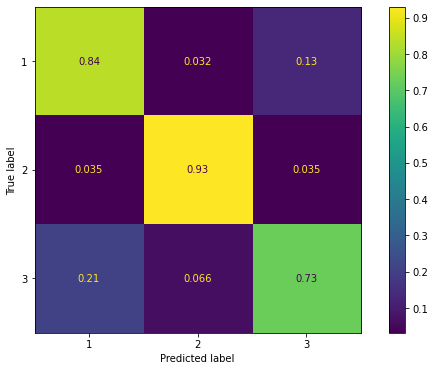

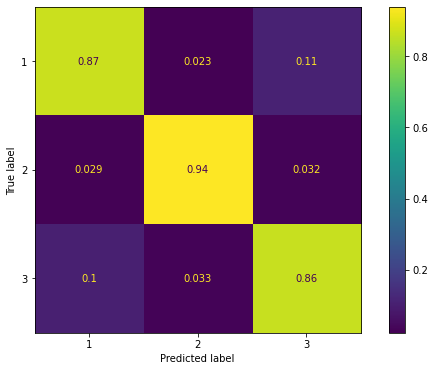

In [20]:
plt.figure(figsize=(12,8))
plot_confusion_matrix(pipe_log, X_test, y_test,normalize="true")
plot_confusion_matrix(pipe_log, X_train, y_train,normalize="true")

In [13]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [22]:
eval_metric(pipe_log, X_train, y_train, X_test, y_test)

Test_Set
[[634  24 100]
 [  9 242   9]
 [ 28   9  99]]
              precision    recall  f1-score   support

           1       0.94      0.84      0.89       758
           2       0.88      0.93      0.90       260
           3       0.48      0.73      0.58       136

    accuracy                           0.84      1154
   macro avg       0.77      0.83      0.79      1154
weighted avg       0.87      0.84      0.85      1154


Train_Set
[[2630   70  334]
 [  30  975   33]
 [  57   18  468]]
              precision    recall  f1-score   support

           1       0.97      0.87      0.91      3034
           2       0.92      0.94      0.93      1038
           3       0.56      0.86      0.68       543

    accuracy                           0.88      4615
   macro avg       0.82      0.89      0.84      4615
weighted avg       0.91      0.88      0.89      4615



### Logistic Model GridsearchCV

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced', random_state=42))]
model = Pipeline(steps=operations)

In [52]:
model.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('log', LogisticRegression(class_weight='balanced', random_state=42))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'log': LogisticRegression(class_weight='balanced', random_state=42),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'log__C': 1.0,
 'log__class_weight': 'balanced',
 'log__dual': False,
 'log__fit_intercept': True,
 'log__intercept_scaling': 1,
 'log__l1_ratio': None,
 'log__max_iter': 100,
 'log__multi_class': 'auto',
 'log__n_jobs': None,
 'log__penalty': 'l2',
 'log__random_state': 42,
 'log__solver': 'lbfgs',
 'log__tol': 0.0001,
 'log__verbose': 0,
 'log__warm_start': False}

In [53]:
penalty = ["l2", "l1"]
C = np.logspace(-1, 3, 6)

In [54]:
param_grid_log = {"log__penalty" : penalty,
                        "log__C" : C,
                    'log__solver': ['liblinear', 'lbfgs']
                    }

In [55]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score


In [56]:
recall_Hispanic = make_scorer(recall_score, average=None, labels=[3])

In [57]:
from sklearn.metrics import SCORERS
pd.DataFrame(SCORERS.keys())

,0
0,explained_variance
1,r2
2,max_error
3,neg_median_absolute_error
4,neg_mean_absolute_error
5,neg_mean_absolute_percentage_error
6,neg_mean_squared_error
7,neg_mean_squared_log_error
8,neg_root_mean_squared_error
9,neg_mean_poisson_deviance


In [58]:
pipe_log_grid = GridSearchCV(estimator=model, 
                            param_grid=param_grid_log, 
                            cv=5, n_jobs=-1,
                            verbose=3,
                            scoring=recall_Hispanic)

In [59]:
pipe_log_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'log__C': array([1.00000000e-01, 6.30957344e-01, 3.98107171e+00, 2.51188643e+01,
       1.58489319e+02, 1.00000000e+03]),
                         'log__penalty': ['l2', 'l1'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=[3]),
             verbose=3)

In [60]:
pipe_log_grid.best_params_

{'log__C': 3.981071705534973, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [61]:
pipe_log_grid.best_score_ 

0.7862895005096839

In [62]:
eval_metric(pipe_log_grid, X_train, y_train, X_test, y_test)

Test_Set
[[641  21  96]
 [ 12 239   9]
 [ 29   9  98]]
              precision    recall  f1-score   support

           1       0.94      0.85      0.89       758
           2       0.89      0.92      0.90       260
           3       0.48      0.72      0.58       136

    accuracy                           0.85      1154
   macro avg       0.77      0.83      0.79      1154
weighted avg       0.87      0.85      0.86      1154


Train_Set
[[2653   54  327]
 [  26  981   31]
 [  52   15  476]]
              precision    recall  f1-score   support

           1       0.97      0.87      0.92      3034
           2       0.93      0.95      0.94      1038
           3       0.57      0.88      0.69       543

    accuracy                           0.89      4615
   macro avg       0.83      0.90      0.85      4615
weighted avg       0.92      0.89      0.90      4615



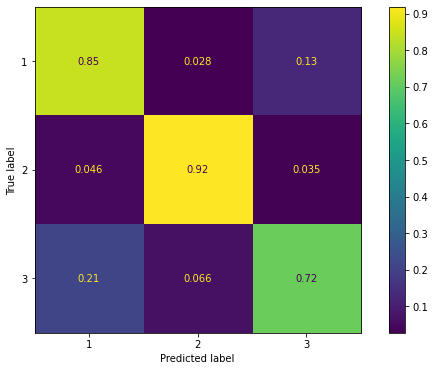

In [114]:
plot_confusion_matrix(pipe_log_grid, X_test, y_test,normalize="true")

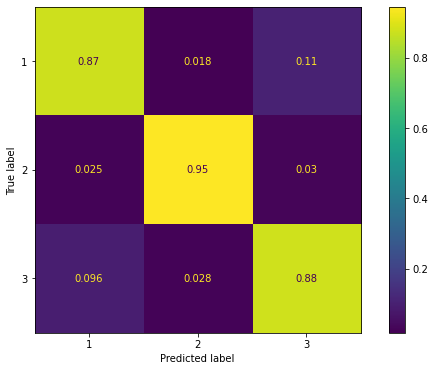

In [115]:
plot_confusion_matrix(pipe_log_grid, X_train, y_train,normalize="true")

In [124]:
pd.DataFrame(pipe_log_grid.cv_results_).mean()[6:10].mean()

0.8403333584520645

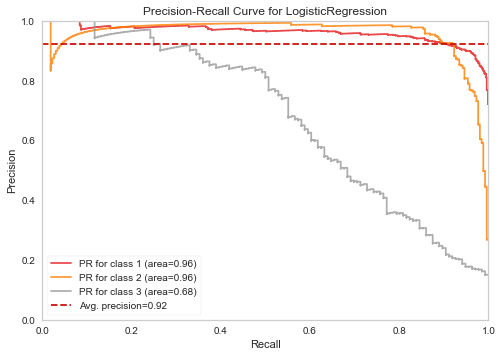

In [290]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= [1,2,3],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [291]:
viz.score_#[3]

{1: 0.9613358656521815,
 2: 0.9577329897798692,
 3: 0.67931081142003,
 'micro': 0.9221496751914087}

In [292]:
y_pred = pipe_log_grid.predict(X_test)

log_AP = viz.score_[3]
log_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
log_recall = recall_score(y_test, y_pred, average=None, labels=[3])

## 2. SVC

### Vanilla SVC model 

In [16]:
from sklearn.svm import SVC, LinearSVC

In [126]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=42))]
pipe_svc = Pipeline(steps=operations_svc)

In [127]:
pipe_svc.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('svc', SVC(class_weight='balanced', random_state=42))])

In [128]:
eval_metric(pipe_svc, X_train, y_train, X_test, y_test)

Test_Set
[[610  19 129]
 [ 13 239   8]
 [ 30   9  97]]
              precision    recall  f1-score   support

           1       0.93      0.80      0.86       758
           2       0.90      0.92      0.91       260
           3       0.41      0.71      0.52       136

    accuracy                           0.82      1154
   macro avg       0.75      0.81      0.77      1154
weighted avg       0.86      0.82      0.83      1154


Train_Set
[[2599   52  383]
 [  44  957   37]
 [  57   17  469]]
              precision    recall  f1-score   support

           1       0.96      0.86      0.91      3034
           2       0.93      0.92      0.93      1038
           3       0.53      0.86      0.66       543

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



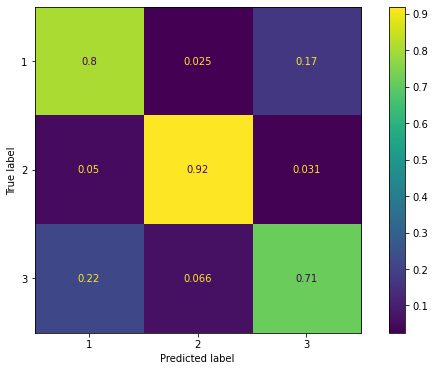

In [129]:
plot_confusion_matrix(pipe_svc, X_test, y_test, normalize="true")

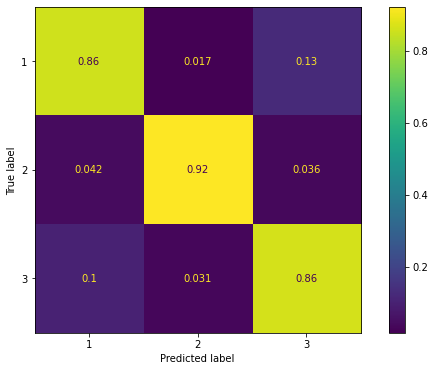

In [130]:
plot_confusion_matrix(pipe_svc, X_train, y_train, normalize="true")

###  SVC Model GridsearchCV

In [25]:
operations_svc_grid = [ ("scaler", MinMaxScaler()), ("svc",SVC(random_state=42,class_weight="balanced",)) ] 
model_svc = Pipeline(steps=operations_svc_grid)

In [27]:
param_grid_svc = {
                    "svc__C" : [0.01,0.5,1],
                    "svc__kernel" : ['linear', "rbf"],
                    "svc__gamma": ['scale', 'auto', 1, 0.1]
}

In [28]:
model_svc.get_params()

{'memory': None,
 'steps': [('scaler', MinMaxScaler()),
  ('svc', SVC(class_weight='balanced', random_state=42))],
 'verbose': False,
 'scaler': MinMaxScaler(),
 'svc': SVC(class_weight='balanced', random_state=42),
 'scaler__clip': False,
 'scaler__copy': True,
 'scaler__feature_range': (0, 1),
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': 'balanced',
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability': False,
 'svc__random_state': 42,
 'svc__shrinking': True,
 'svc__tol': 0.001,
 'svc__verbose': False}

In [29]:
pipe_svc_grid = GridSearchCV(estimator=model_svc, 
                            param_grid=param_grid_svc, 
                            cv=5, verbose=3,
                            n_jobs=-1,
                            scoring=recall_Hispanic)

In [30]:
pipe_svc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.01, 0.5, 1],
                         'svc__gamma': ['scale', 'auto', 1, 0.1],
                         'svc__kernel': ['linear', 'rbf']},
             scoring=make_scorer(recall_score, average=None, labels=[3]),
             verbose=3)

In [31]:
pipe_svc_grid.best_params_

{'svc__C': 0.5, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}

In [32]:
pipe_svc_grid.best_score_ 

0.7753143051308189

In [33]:
eval_metric(pipe_svc_grid, X_train, y_train, X_test, y_test)

Test_Set
[[632  19 107]
 [ 13 238   9]
 [ 28   8 100]]
              precision    recall  f1-score   support

           1       0.94      0.83      0.88       758
           2       0.90      0.92      0.91       260
           3       0.46      0.74      0.57       136

    accuracy                           0.84      1154
   macro avg       0.77      0.83      0.79      1154
weighted avg       0.87      0.84      0.85      1154


Train_Set
[[2608   55  371]
 [  35  971   32]
 [  61   16  466]]
              precision    recall  f1-score   support

           1       0.96      0.86      0.91      3034
           2       0.93      0.94      0.93      1038
           3       0.54      0.86      0.66       543

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.89      4615



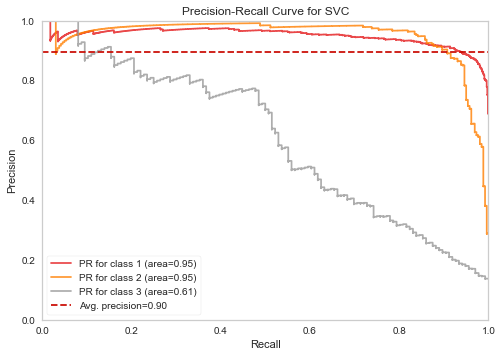

In [293]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=0.5, class_weight="balanced",random_state=42))]
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= [1,2,3],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [294]:
y_pred = pipe_svc_grid.predict(X_test)

svc_AP = viz.score_[3]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=[3])
svc_recall = recall_score(y_test, y_pred, average=None, labels=[3])

## 3. RF

In [120]:
from sklearn.preprocessing import OrdinalEncoder

In [236]:
X2 = df2.drop("DODRace",axis=1)
y = df2.DODRace

In [237]:
cat = X2.select_dtypes("object").columns
cat

Index(['Gender', 'Installation', 'Component', 'Branch', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [238]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Installation,Component,Branch,SubjectsBirthLocation,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1.0,6.0,2.0,0.0,91.0,41,2.0
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1.0,6.0,2.0,2.0,86.0,35,1.0
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,1.0,6.0,2.0,2.0,86.0,42,1.0
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1.0,6.0,2.0,1.0,133.0,31,2.0
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,1.0,6.0,2.0,1.0,90.0,21,2.0


In [246]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [247]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (4615, 100)
Train target shape   :  (4615,)
Test features shape  :  (1154, 100)
Test target shape    :  (1154,)


### Vanilla RF Model

In [248]:
from sklearn.ensemble import RandomForestClassifier

In [249]:
rf = RandomForestClassifier(random_state=42)

In [250]:
operations_rf = [ ("scaler", MinMaxScaler()), ("rf", RandomForestClassifier(random_state=42, class_weight="balanced")) ]
pipe_rf = Pipeline(steps=operations_rf)

In [251]:
pipe_rf.fit(X_train2, y_train2)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('rf',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [252]:
eval_metric(pipe_rf, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[748   9   1]
 [ 79 181   0]
 [117  15   4]]
              precision    recall  f1-score   support

           1       0.79      0.99      0.88       758
           2       0.88      0.70      0.78       260
           3       0.80      0.03      0.06       136

    accuracy                           0.81      1154
   macro avg       0.83      0.57      0.57      1154
weighted avg       0.81      0.81      0.76      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



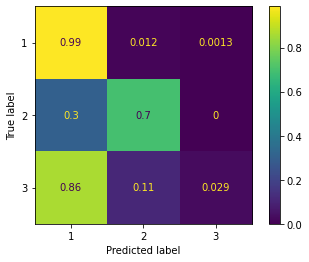

In [253]:
plot_confusion_matrix(pipe_rf, X_test2, y_test2, normalize="true")

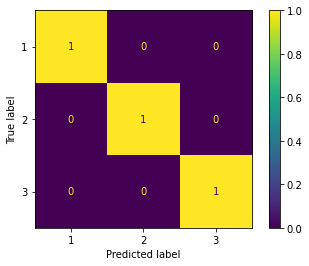

In [254]:
plot_confusion_matrix(pipe_rf, X_train2, y_train2, normalize="true")

### RF Model GridsearchCV

In [255]:
operations_rf_grid = [ ("scale", MinMaxScaler()), ("rf", RandomForestClassifier(random_state=42, class_weight="balanced")) ]
model_rf_grid = Pipeline(steps=operations_rf_grid)

In [256]:
param_grid_rf = {
                   'rf__max_depth' : [5,10,13,16,20],
                   'rf__n_estimators' : [100,250,500]



}

In [258]:
pipe_rf_grid = GridSearchCV(estimator=model_rf_grid,
                            param_grid=param_grid_rf,
                            cv=5, n_jobs=-1, verbose=3,
                            scoring=recall_Hispanic
                            )

In [259]:
model_rf_grid.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scale', 'rf', 'scale__clip', 'scale__copy', 'scale__feature_range', 'rf__bootstrap', 'rf__ccp_alpha', 'rf__class_weight', 'rf__criterion', 'rf__max_depth', 'rf__max_features', 'rf__max_leaf_nodes', 'rf__max_samples', 'rf__min_impurity_decrease', 'rf__min_samples_leaf', 'rf__min_samples_split', 'rf__min_weight_fraction_leaf', 'rf__n_estimators', 'rf__n_jobs', 'rf__oob_score', 'rf__random_state', 'rf__verbose', 'rf__warm_start'])

In [260]:
pipe_rf_grid.fit(X_train2, y_train2)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', MinMaxScaler()),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [5, 10, 13, 16, 20],
                         'rf__n_estimators': [100, 250, 500]},
             scoring=make_scorer(recall_score, average=None, labels=[3]),
             verbose=3)

In [261]:
pipe_rf_grid.best_params_

{'rf__max_depth': 5, 'rf__n_estimators': 500}

In [262]:
pipe_rf_grid.best_score_

0.6133197417601088

In [263]:
eval_metric(pipe_rf_grid, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[480  64 214]
 [ 24 208  28]
 [ 36  24  76]]
              precision    recall  f1-score   support

           1       0.89      0.63      0.74       758
           2       0.70      0.80      0.75       260
           3       0.24      0.56      0.33       136

    accuracy                           0.66      1154
   macro avg       0.61      0.66      0.61      1154
weighted avg       0.77      0.66      0.69      1154


Train_Set
[[1976  214  844]
 [  63  875  100]
 [ 105   38  400]]
              precision    recall  f1-score   support

           1       0.92      0.65      0.76      3034
           2       0.78      0.84      0.81      1038
           3       0.30      0.74      0.42       543

    accuracy                           0.70      4615
   macro avg       0.67      0.74      0.67      4615
weighted avg       0.82      0.70      0.73      4615



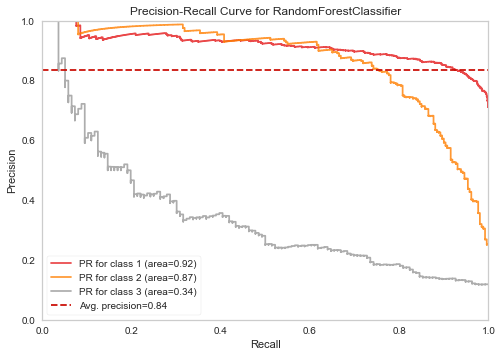

In [298]:
model = RandomForestClassifier(class_weight="balanced", random_state=42, max_depth=5, n_estimators = 500)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= [1,2,3],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [300]:
y_pred = pipe_rf_grid.predict(X_test2)

rf_AP = viz.score_[3]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=[3])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=[3])

## 4. XGBoost

### Vanilla XGBoost Model

In [264]:
from xgboost import XGBClassifier

In [274]:
xgb = XGBClassifier(random_state=42)

In [275]:
xgb.fit(X_train2, y_train2)

[01:05:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [277]:
eval_metric(xgb, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[734  15   9]
 [ 31 224   5]
 [ 81  15  40]]
              precision    recall  f1-score   support

           1       0.87      0.97      0.92       758
           2       0.88      0.86      0.87       260
           3       0.74      0.29      0.42       136

    accuracy                           0.86      1154
   macro avg       0.83      0.71      0.74      1154
weighted avg       0.86      0.86      0.85      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



### XGBoost Model GridsearchCV

In [278]:
xgb_grid_ = XGBClassifier(random_state=42)

In [272]:
xgb_grid_.get_params().keys()

dict_keys(['objective', 'use_label_encoder', 'base_score', 'booster', 'colsample_bylevel', 'colsample_bynode', 'colsample_bytree', 'enable_categorical', 'gamma', 'gpu_id', 'importance_type', 'interaction_constraints', 'learning_rate', 'max_delta_step', 'max_depth', 'min_child_weight', 'missing', 'monotone_constraints', 'n_estimators', 'n_jobs', 'num_parallel_tree', 'predictor', 'random_state', 'reg_alpha', 'reg_lambda', 'scale_pos_weight', 'subsample', 'tree_method', 'validate_parameters', 'verbosity'])

In [279]:
param_grid_xgb = {
                    "n_estimators":[100, 300],
                    'max_depth':[3,5,6],
                    "learning_rate": [0.1, 0.3],
                    "subsample":[0.5, 1],
                    "colsample_bytree":[0.5, 1]

}

In [280]:
xgb_grid = GridSearchCV(estimator=xgb_grid_,
                        param_grid=param_grid_xgb,
                        n_jobs=-1, cv=5, verbose=3,
                        scoring=recall_Hispanic

)

In [281]:
xgb_grid.fit(X_train2, y_train2)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[01:19:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, ver

In [282]:
xgb_grid.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.3,
 'max_depth': 3,
 'n_estimators': 300,
 'subsample': 1}

In [283]:
xgb_grid.best_score_

0.4493713897383622

In [284]:
eval_metric(xgb_grid, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[735  11  12]
 [ 25 233   2]
 [ 77  15  44]]
              precision    recall  f1-score   support

           1       0.88      0.97      0.92       758
           2       0.90      0.90      0.90       260
           3       0.76      0.32      0.45       136

    accuracy                           0.88      1154
   macro avg       0.85      0.73      0.76      1154
weighted avg       0.87      0.88      0.86      1154


Train_Set
[[3034    0    0]
 [   0 1038    0]
 [   0    0  543]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3034
           2       1.00      1.00      1.00      1038
           3       1.00      1.00      1.00       543

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [288]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights

array([2.8330264 , 2.8330264 , 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [287]:
from yellowbrick.classifier import PrecisionRecallCurve


[01:53:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:53:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


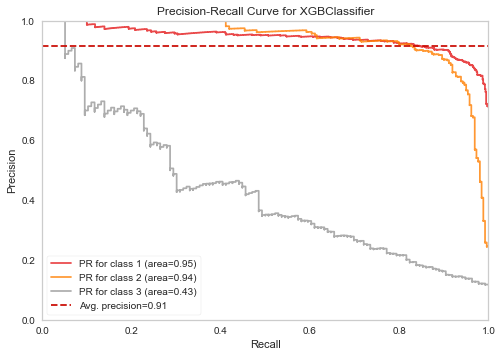

In [301]:
model = XGBClassifier(random_state=42, colsample_bytree=0.5, subsample=0.5)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= [1,2,3],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [342]:
y_pred2 = xgb_grid.predict(X_test2)

xgb_AP = viz.score_[3]
xgb_f1 = f1_score(y_test2, y_pred2, average=None, labels=[3])
xgb_recall = recall_score(y_test2, y_pred2, average=None, labels=[3])

## Comparing Models

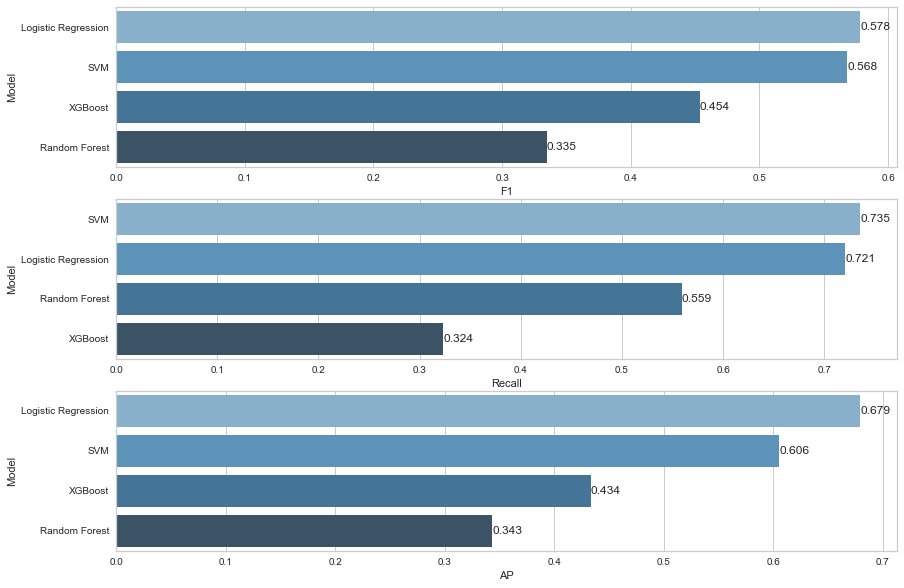

In [303]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [315]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [305]:
y.value_counts()

1    3792
2    1298
3     679
Name: DODRace, dtype: int64

In [306]:
over = SMOTE(sampling_strategy={3 : 1200})
under = RandomUnderSampler(sampling_strategy={1 : 2500})

In [309]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [310]:
y_resampled_over.value_counts()

1    3034
3    1200
2    1038
Name: DODRace, dtype: int64

In [311]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train)

In [313]:
y_resampled_under.value_counts()

1    2500
2    1038
3     543
Name: DODRace, dtype: int64

In [316]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [317]:
y_resampled.value_counts()

1    2500
3    1200
2    1038
Name: DODRace, dtype: int64

In [318]:
y_train.value_counts()

1    3034
2    1038
3     543
Name: DODRace, dtype: int64

In [319]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]

In [320]:
smote_pipeline = imbpipeline(steps=operations)

In [321]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={3: 1200})),
                ('u', RandomUnderSampler(sampling_strategy={1: 2500})),
                ('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [322]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[654  24  80]
 [ 12 243   5]
 [ 34  12  90]]
              precision    recall  f1-score   support

           1       0.93      0.86      0.90       758
           2       0.87      0.93      0.90       260
           3       0.51      0.66      0.58       136

    accuracy                           0.86      1154
   macro avg       0.77      0.82      0.79      1154
weighted avg       0.87      0.86      0.86      1154


Train_Set
[[2745   58  231]
 [  29  985   24]
 [ 105   28  410]]
              precision    recall  f1-score   support

           1       0.95      0.90      0.93      3034
           2       0.92      0.95      0.93      1038
           3       0.62      0.76      0.68       543

    accuracy                           0.90      4615
   macro avg       0.83      0.87      0.85      4615
weighted avg       0.91      0.90      0.90      4615



In [324]:
scoring = ["f1", "recall", "precision", "accuracy"]

In [326]:
model = smote_pipeline = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_score    0.877576
dtype: float64

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [329]:
y_pred = pipe_log_grid.predict(X_test)

In [330]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.7232211991768391

In [331]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7168145541346214

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [344]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [355]:
model_shap = LogisticRegression(C=3.98,class_weight='balanced',max_iter=10000, random_state=42, penalty="l2", solver='lbfgs')
model_shap.fit(X_train_scaled, y_train)

LogisticRegression(C=3.98, class_weight='balanced', max_iter=10000,
                   random_state=42)

In [ ]:
'log__C': 3.981071705534973, 'log__penalty': 'l2', 'log__solver': 'lbfgs'

In [356]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[642  19  97]
 [ 12 242   6]
 [ 31   7  98]]
              precision    recall  f1-score   support

           1       0.94      0.85      0.89       758
           2       0.90      0.93      0.92       260
           3       0.49      0.72      0.58       136

    accuracy                           0.85      1154
   macro avg       0.78      0.83      0.80      1154
weighted avg       0.88      0.85      0.86      1154


Train_Set
[[2671   51  312]
 [  23  985   30]
 [  55   15  473]]
              precision    recall  f1-score   support

           1       0.97      0.88      0.92      3034
           2       0.94      0.95      0.94      1038
           3       0.58      0.87      0.70       543

    accuracy                           0.89      4615
   macro avg       0.83      0.90      0.85      4615
weighted avg       0.92      0.89      0.90      4615



In [357]:
import shap
explainer = shap.Explainer(model_shap,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

In [358]:
shap_values

[array([[-1.22726063e+01, -1.41760041e+01, -1.87632687e+00,
         -2.71649052e+01, -6.54514260e+00,  5.87678378e-01,
         -3.17841846e+00, -1.06469236e+00,  2.91460254e+01,
         -4.49554265e+00, -3.39299183e+01, -2.01440627e+00,
          3.17390270e+01,  3.11852207e+00, -7.08726585e-02,
         -5.83035866e+00,  1.25422853e+01,  9.23781426e+01,
          1.04392888e+01,  5.75743397e+01, -3.03845853e+01,
          1.87851689e+00,  3.98195824e+01,  2.24345579e+00,
         -1.96101745e+01, -2.72219812e+01, -1.88858843e+01,
          3.79716292e+00, -9.47438122e-01,  8.10481465e-01,
          7.71415752e-01, -6.61513600e-01, -6.74034638e+01,
          3.48203426e+01, -4.05897746e+00,  3.35306655e-01,
          2.82481726e+00,  1.00927089e+00,  6.30764138e+01,
          1.31198063e+01, -2.00264333e-01, -7.27354914e-01,
         -1.78152659e+00, -2.80832735e+00, -4.10412421e+00,
         -1.06026822e+01,  9.10481129e+00, -9.47989143e+00,
         -1.04980913e+01,  1.73548091e+0

In [359]:
print(shap_values[0].shape)

(1, 247)


In [363]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = model_shap.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

The log_model predicted: 2


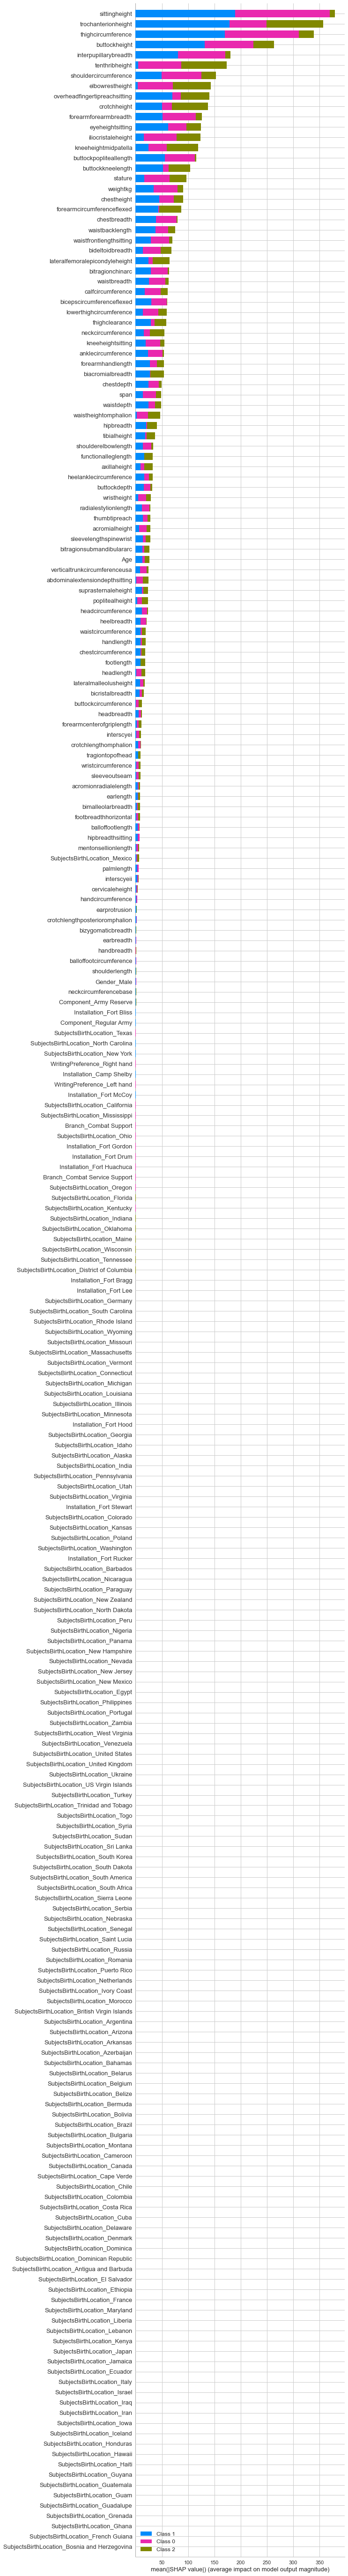

In [361]:
shap.summary_plot(shap_values, X_train_scaled,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [365]:
eval_metric(pipe_log_grid, X_train, y_train, X_test, y_test)

Test_Set
[[641  21  96]
 [ 12 239   9]
 [ 29   9  98]]
              precision    recall  f1-score   support

           1       0.94      0.85      0.89       758
           2       0.89      0.92      0.90       260
           3       0.48      0.72      0.58       136

    accuracy                           0.85      1154
   macro avg       0.77      0.83      0.79      1154
weighted avg       0.87      0.85      0.86      1154


Train_Set
[[2653   54  327]
 [  26  981   31]
 [  52   15  476]]
              precision    recall  f1-score   support

           1       0.97      0.87      0.92      3034
           2       0.93      0.95      0.94      1038
           3       0.57      0.88      0.69       543

    accuracy                           0.89      4615
   macro avg       0.83      0.90      0.85      4615
weighted avg       0.92      0.89      0.90      4615



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___